# Please double check for errors or misinterpretations ~Kailash

In [1]:
from bigdata_a3_utils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import gc
from scipy.stats import pearsonr

In [2]:
def get_needed_cols(base_path, category):
    #columns we want
    needed= ["rating", "main_category", "brand", "year", "review_length", "helpful_vote", "verified_purchase"]
    #read in pickle file
    print(f"Reading in {category} data")
    df= pd.read_pickle(base_path / f"cleaned_data_{category}.pkl")
    print(f"Finished reading in {category} data")
    
    columns_to_drop = df.columns.difference(needed)
    df.drop(columns=columns_to_drop, inplace=True)
    print("Dropped unneeded columns")
    gc.collect()
    return df
    

In [3]:
base_path= Path(r"F:\Saeed\frames")

dfs = []

categories= VALID_CATEGORIES
for category in categories:
    x = get_needed_cols(base_path, category)
    dfs.append(x)
    gc.collect()

temp_unified = pd.concat(dfs, ignore_index=True)
del dfs
gc.collect()

Reading in All_Beauty data
Finished reading in All_Beauty data
Dropped unneeded columns
Reading in Amazon_Fashion data
Finished reading in Amazon_Fashion data
Dropped unneeded columns
Reading in Appliances data
Finished reading in Appliances data
Dropped unneeded columns
Reading in Arts_Crafts_and_Sewing data
Finished reading in Arts_Crafts_and_Sewing data
Dropped unneeded columns
Reading in Automotive data
Finished reading in Automotive data
Dropped unneeded columns
Reading in Baby_Products data
Finished reading in Baby_Products data
Dropped unneeded columns
Reading in Beauty_and_Personal_Care data
Finished reading in Beauty_and_Personal_Care data
Dropped unneeded columns
Reading in Books data
Finished reading in Books data
Dropped unneeded columns
Reading in CDs_and_Vinyl data
Finished reading in CDs_and_Vinyl data
Dropped unneeded columns
Reading in Cell_Phones_and_Accessories data
Finished reading in Cell_Phones_and_Accessories data
Dropped unneeded columns
Reading in Clothing_Shoe

0

In [4]:
temp_unified.head(1)

,rating,helpful_vote,verified_purchase,main_category,brand,year,review_length
0,5.0,0,True,All Beauty,HERBIVORE,2020,61


# Star Rating

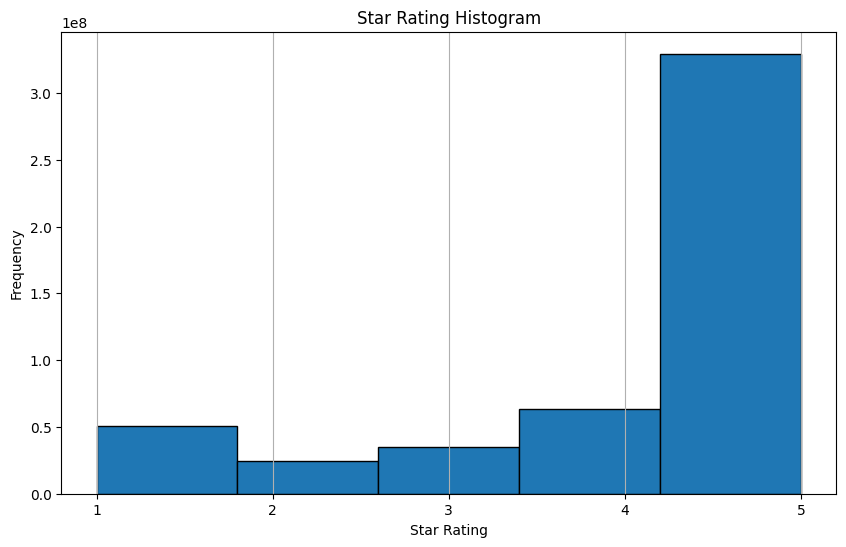

In [5]:
def plot_star_rating():
    plt.figure(figsize=(10, 6))
    temp_unified['rating'].hist(bins=5, edgecolor='black')
    plt.title('Star Rating Histogram')
    plt.xlabel('Star Rating')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))
    plt.grid(axis='y')
    plt.show()

plot_star_rating()

# Top 10 Categories

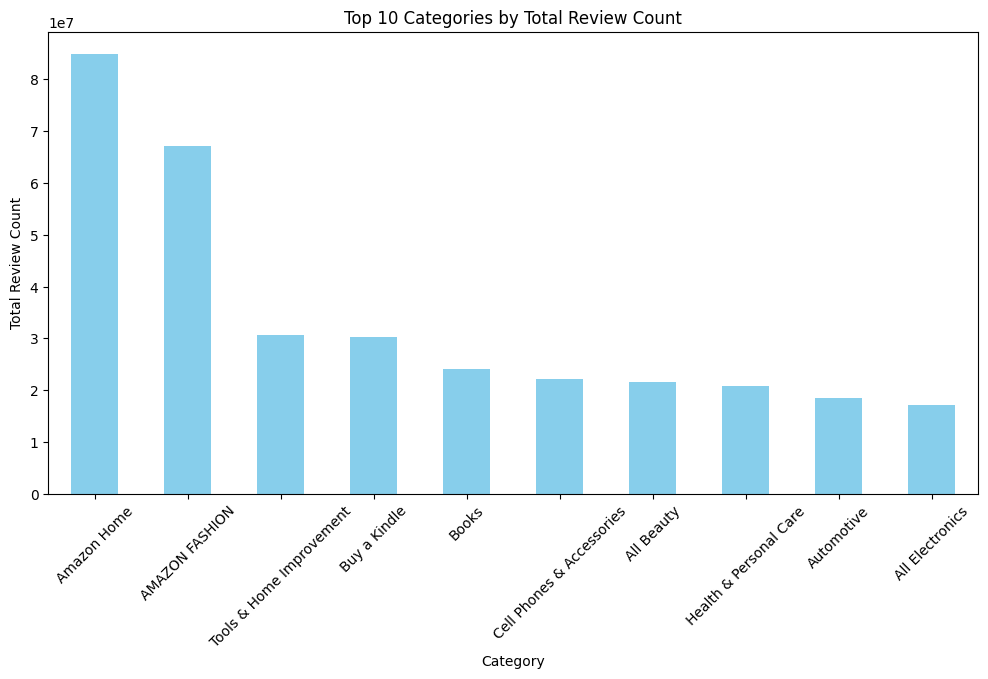

In [6]:
def plot_top_10_categories():
    top_categories = temp_unified['main_category'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    top_categories.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Categories by Total Review Count')
    plt.xlabel('Category')
    plt.ylabel('Total Review Count')
    plt.xticks(rotation=45)
    plt.show()
    
plot_top_10_categories()

# Top 10 brands excluding Unknown

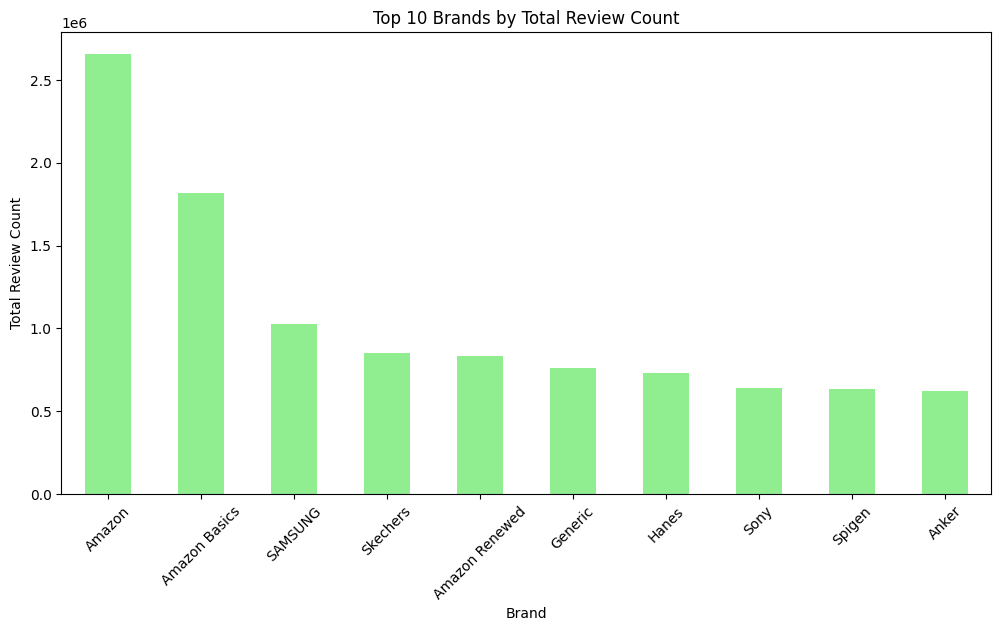

In [7]:
def plot_top_10_brands_excluding_unknown():
    top_brands = temp_unified[temp_unified['brand'] != 'Unknown']['brand'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    top_brands.plot(kind='bar', color='lightgreen')
    plt.title('Top 10 Brands by Total Review Count')
    plt.xlabel('Brand')
    plt.ylabel('Total Review Count')
    plt.xticks(rotation=45)
    plt.show()

plot_top_10_brands_excluding_unknown()

# Average rating per year

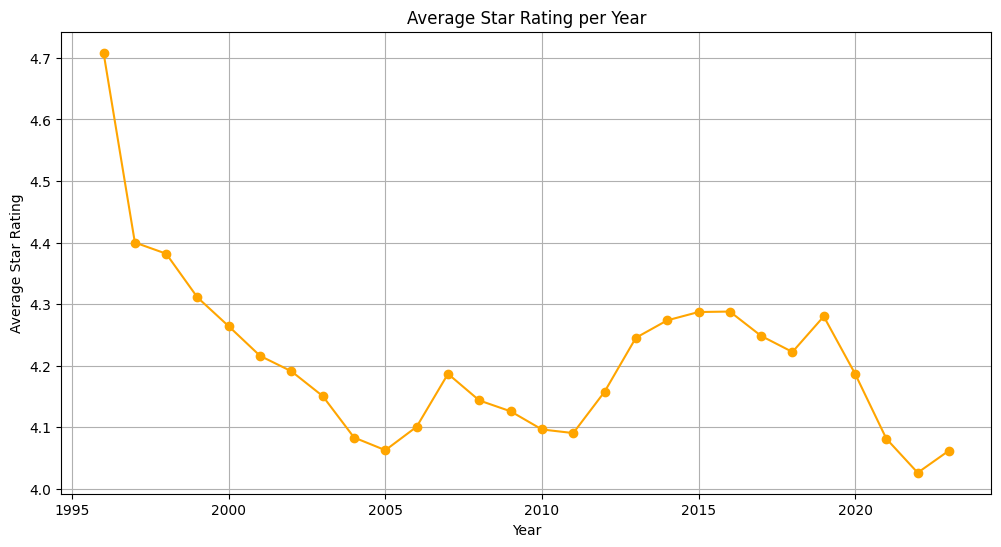

In [8]:

def plot_average_rating_per_year():
    average_rating_per_year = temp_unified.groupby('year')['rating'].mean()
    plt.figure(figsize=(12, 6))
    average_rating_per_year.plot(kind='line', marker='o', color='orange')
    plt.title('Average Star Rating per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Star Rating')
    plt.grid()
    plt.show()

plot_average_rating_per_year()

# Correlation

In [9]:
correlation = temp_unified['review_length'].corr(temp_unified['rating'])
print(f'Pearson correlation between review length and star rating: {correlation:.2f}')

Pearson correlation between review length and star rating: -0.07


Pearson correlation coefficient: -0.0669
P-value: 0.0000


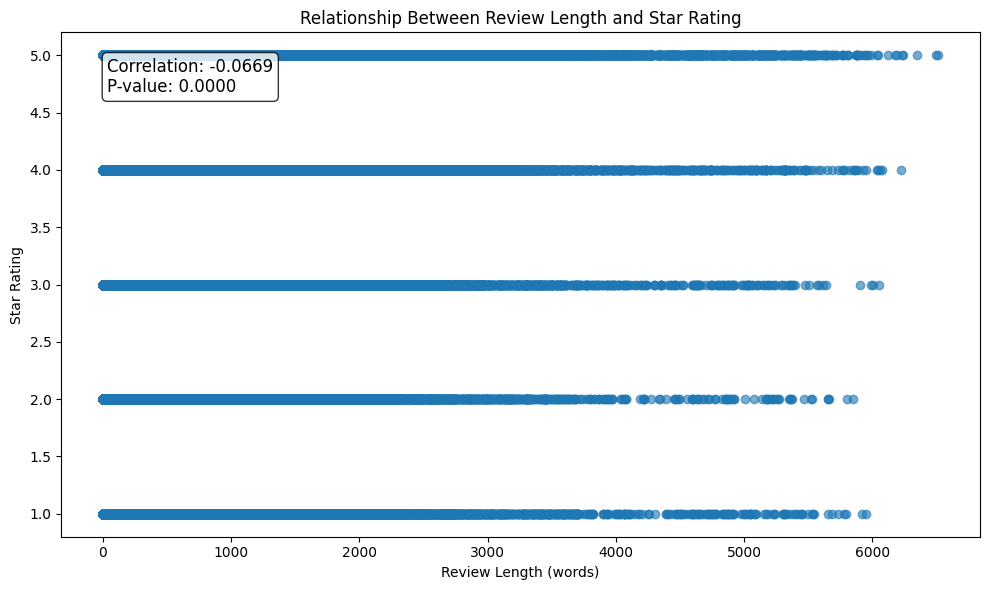

In [10]:
correlation, p_value = pearsonr(temp_unified['review_length'], temp_unified['rating'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")



plt.figure(figsize=(10, 6))
plt.scatter(temp_unified['review_length'], temp_unified['rating'], alpha=0.6)
plt.title('Relationship Between Review Length and Star Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Star Rating')

plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}\nP-value: {p_value:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


# Distribution of helpful vote counts

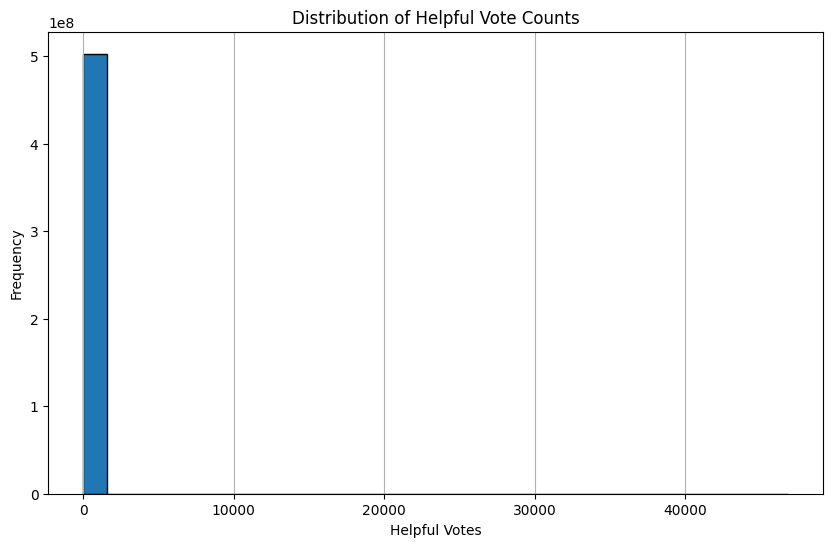

In [11]:
def plot_helpful_vote_counts():
    plt.figure(figsize=(10, 6))
    temp_unified['helpful_vote'].hist(bins=30, edgecolor='black')
    plt.title('Distribution of Helpful Vote Counts')
    plt.xlabel('Helpful Votes')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

plot_helpful_vote_counts()

# Relationship between verified purchase and star rating

C:\Users\aidanp\AppData\Local\Temp\ipykernel_25952\2615304014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='verified_purchase', y='rating', data=temp_unified, palette='Set2')


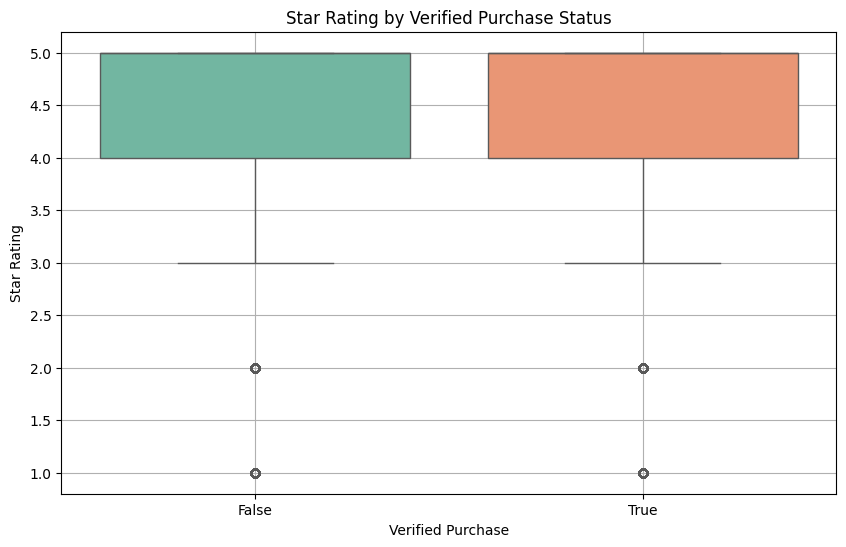

In [12]:
def plot_relationship_between_verified_purchase_and_rating():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='verified_purchase', y='rating', data=temp_unified, palette='Set2')
    plt.title('Star Rating by Verified Purchase Status')
    plt.xlabel('Verified Purchase')
    plt.ylabel('Star Rating')
    plt.grid()
    plt.show()

plot_relationship_between_verified_purchase_and_rating()